In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [12]:
def func(x, y):

    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


In [13]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [14]:
grid_x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01010101, 0.01010101, 0.01010101, ..., 0.01010101, 0.01010101,
        0.01010101],
       [0.02020202, 0.02020202, 0.02020202, ..., 0.02020202, 0.02020202,
        0.02020202],
       ...,
       [0.97979798, 0.97979798, 0.97979798, ..., 0.97979798, 0.97979798,
        0.97979798],
       [0.98989899, 0.98989899, 0.98989899, ..., 0.98989899, 0.98989899,
        0.98989899],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [15]:
rng = np.random.default_rng()

points = rng.random((1000, 2))

values = func(points[:,0], points[:,1])

In [16]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


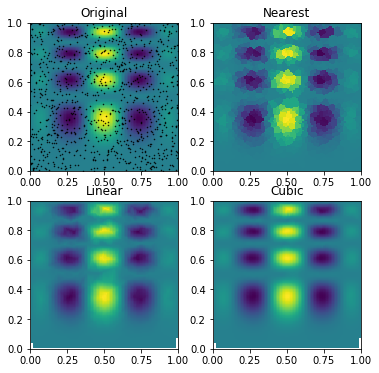

In [17]:
plt.subplot(221)

plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')

plt.plot(points[:,0], points[:,1], 'k.', ms=1)

plt.title('Original')

plt.subplot(222)

plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')

plt.title('Nearest')

plt.subplot(223)

plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')

plt.title('Linear')

plt.subplot(224)

plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')

plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)

plt.show()

In [56]:
################################
################################
################################
################################
#defining triangular lattice
a=1
a_1=a*np.array([1,0,0])
a_2=a*np.array([1/2,np.sqrt(3)/2,0])
zhat=np.array([0,0,1])

Vol_real=np.dot(np.cross(a_1,a_2),zhat)
b_1=np.cross(a_2,zhat)*(2*np.pi)/Vol_real
b_2=np.cross(zhat,a_1)*(2*np.pi)/Vol_real
Vol_rec=np.dot(np.cross(b_1,b_2),zhat)
#print(np.dot(a_2,b_2),np.dot(a_1,b_1))

Np=80
n1=np.arange(-Np,Np+1)
n2=np.arange(-Np,Np+1)

a_1=a_1[0:2]
a_2=a_2[0:2]
b_1=b_1[0:2]
b_2=b_2[0:2]

#getting the first brilloin zone from the Voronoi decomp of the recipprocal lattice
#input: reciprocal lattice vectors
#output: Points that delimit the FBZ -
#high symmetry points (for now just the triangular lattice will be implemented)
from scipy.spatial import Voronoi, voronoi_plot_2d
def FBZ_points(b_1,b_2):
    #creating reciprocal lattice
    Np=4
    n1=np.arange(-Np,Np+1)
    n2=np.arange(-Np,Np+1)
    Recip_lat=[]
    for i in n1:
        for j in n2:
            point=b_1*i+b_2*j
            Recip_lat.append(point)

    #getting the nearest neighbours to the gamma point
    Recip_lat_arr=np.array(Recip_lat)
    dist=np.round(np.sqrt(np.sum(Recip_lat_arr**2, axis=1)),decimals=10)
    sorted_dist=np.sort(list(set(dist)) )
    points=Recip_lat_arr[np.where(dist<sorted_dist[2])[0]]

    #getting the voronoi decomposition of the gamma point and the nearest neighbours
    vor = Voronoi(points)
    Vertices=(vor.vertices)

    #ordering the points counterclockwise in the -pi,pi range
    angles_list=list(np.arctan2(Vertices[:,1],Vertices[:,0]))
    Vertices_list=list(Vertices)

    #joint sorting the two lists for angles and vertices for convenience later.
    # the linear plot routine requires the points to be in order
    # atan2 takes into acount quadrant to get the sign of the angle
    angles_list, Vertices_list = (list(t) for t in zip(*sorted(zip(angles_list, Vertices_list))))

    ##getting the M points as the average of consecutive K- Kp points
    Edges_list=[]
    for i in range(len(Vertices_list)):
        Edges_list.append([(Vertices_list[i][0]+Vertices_list[i-1][0])/2,(Vertices_list[i][1]+Vertices_list[i-1][1])/2])

    Gamma=[0,0]
    K=Vertices_list[0::2]
    Kp=Vertices_list[1::2]
    M=Edges_list[0::2]
    Mp=Edges_list[1::2]

    return Vertices_list, Gamma, K, Kp, M, Mp

Vertices_list, Gamma, K, Kp, M, Mp=FBZ_points(b_1,b_2)


#######reciprocal lattice
#creating reciprocal lattice preparing for k-point integration
Recip_lat=[]
for i in n1:
    for j in n2:
        point=b_1*i+b_2*j
        Recip_lat.append(point)


################################
################################
################################
################################
#########
#####CREATING SAMPLES FOR INTEGRATION

#generating k points

#square sampling
#kxx,kyy=np.meshgrid(kx,ky)
scale_fac=0.0831

In [57]:
#Shrinking the reciprocal lattice
def hexsamp(b_1,b_2,scale_fac,Np_p):
    n1_p=np.arange(-Np_p,Np_p+1)
    n2_p=np.arange(-Np_p,Np_p+1)

    Recip_lat_p=[]
    for i in n1_p:
        for j in n2_p:
            point=b_1*i+b_2*j
            Recip_lat_p.append(point)

    Recip_lat_p_arr=scale_fac*np.array(Recip_lat_p)
    kxx=Recip_lat_p_arr[:,0]
    kyy=Recip_lat_p_arr[:,1]

    phi=2*np.pi/6 #rotation angle

    #rotating and cleaving if absolute value of rotated point's y coordinate exceeds top boundary of 1BZ
    kxx_rot=np.cos(phi)*kxx-np.sin(phi)*kyy
    kyy_rot=np.sin(phi)*kxx+np.cos(phi)*kyy

    kxx2=kxx[np.where(np.abs(kyy_rot)<K[2][1])]
    kyy2=kyy[np.where(np.abs(kyy_rot)<K[2][1])]

    #rotating and cleaving if absolute value of rotated point's y coordinate exceeds top boundary of 1BZ
    kxx_rot2=np.cos(-phi)*kxx2-np.sin(-phi)*kyy2
    kyy_rot2=np.sin(-phi)*kxx2+np.cos(-phi)*kyy2

    kxx3=kxx2[np.where(np.abs(kyy_rot2)<K[2][1])]
    kyy3=kyy2[np.where(np.abs(kyy_rot2)<K[2][1])]

    #cleaving if absolute value of point's y coordinate exceeds top boundary of 1BZ
    KX_p=kxx3[np.where(np.abs(kyy3)<K[2][1])]
    KY_p=kyy3[np.where(np.abs(kyy3)<K[2][1])]

    return KX_p,KY_p
KX, KY=hexsamp(b_1,b_2,scale_fac,Np)

In [58]:
def Sf(kx,ky,lam,T):
    gam=2*np.cos(kx)+4*np.cos(kx/2)*np.cos(np.sqrt(3)*ky/2)
    return 3/(lam+(1/T)*gam)

def bisection(f,a,b,N,T,KX,KY):
    '''Approximate solution of f(x)=0 on interval [a,b] by bisection method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    x_N : number
        The midpoint of the Nth interval computed by the bisection method. The
        initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0 for some
        midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iteration, the bisection method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> bisection(f,1,2,25)
    1.618033990263939
    >>> f = lambda x: (2*x - 1)*(x - 3)
    >>> bisection(f,0,1,10)
    0.5
    '''
    if f(a,T,KX,KY)*f(b,T,KX,KY) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n,T,KX,KY)
        if f(a_n,T,KX,KY)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n,T,KX,KY)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n)/2
def f(lam,T,KX,KY):
    curlyN=np.size(KX)
    return np.sum(Sf(KX,KY,lam,T))/curlyN -1

In [59]:
alphl=[0.0054342689, 0.00645511652936,0.0085441664872,0.008896935]
def alphfunc(T):
    return np.piecewise(T, [T <= 0.5, (T <= 1.0) & (T>0.5), (T <= 10.0) & (T>1.0), T>10.0], alphl)

T=10.0
lam=bisection(f,3/T,40,170,T,KX,KY)
alph=alphfunc(T)

def func(kx,ky,ome,T,lam,alph):
    gam=2*np.cos(kx)+4*np.cos(kx/2)*np.cos(np.sqrt(3)*ky/2)
    SP=3/(lam+(1/T)*gam)
    fq=(gam**2)/T +gam*(lam-6/T)- 6*lam
    fq=alph*fq
    return -2*SP*(fq/(ome**2+fq**2))

Found exact solution.


In [60]:
limits_X=4.2
limits_Y=4.2
N_X=120
N_Y=120
grid_x, grid_y = np.mgrid[-4.2:4.2:120j, -4.2:4.2:120j]

In [64]:

points = np.array([KX,KY]).T

values = func(KX, KY,200,T,lam,alph)

In [65]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')

grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')

grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')


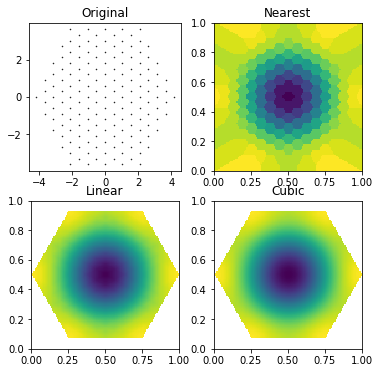

In [71]:
plt.subplot(221)

#plt.imshow(func(KX, KY,0.001,T,lam,alph).T, extent=(0,1,0,1), origin='lower')

plt.plot(points[:,0], points[:,1], 'k.', ms=1)

plt.title('Original')

plt.subplot(222)

plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')

plt.title('Nearest')

plt.subplot(223)

plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')

plt.title('Linear')

plt.subplot(224)

plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')

plt.title('Cubic')

plt.gcf().set_size_inches(6, 6)

plt.show()

In [67]:
a = griddata(points, values, [0.1,0.1], method='cubic')
print(a)

[4.22181229e-08]


In [68]:
a = griddata(points, values, [0.1,0.1], method='linear')
print(a)

[1.78707002e-07]


In [53]:
a = griddata(points, values, [0.1,0.1], method='nearest')
print(a)

[818.8159125]


In [55]:
np.shape(grid_x)

(120, 120)